In [71]:
import pandas as pd

In [72]:
import matplotlib.pyplot as plt

In [73]:
import seaborn as sns

Setting Style:

In [74]:
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.sans-serif'] = ['Arial']

Initial Data Loading and Inspection:

In [75]:
df_housing = pd.read_csv('city_market_tracker.tsv', sep='\t')

In [76]:
print(df_housing.head())

  PERIOD_BEGIN  PERIOD_END  PERIOD_DURATION REGION_TYPE  REGION_TYPE_ID  \
0   2015-10-01  2015-10-31               30       place               6   
1   2014-04-01  2014-04-30               30       place               6   
2   2017-10-01  2017-10-31               30       place               6   
3   2024-07-01  2024-07-31               30       place               6   
4   2022-01-01  2022-01-31               30       place               6   

   TABLE_ID  IS_SEASONALLY_ADJUSTED            REGION          CITY  \
0      8591                   False  Indian Trail, NC  Indian Trail   
1      8225                   False   Hainesville, IL   Hainesville   
2     10716                   False     Maysville, NC     Maysville   
3      3140                   False      Chewelah, WA      Chewelah   
4     11322                   False       Lombard, IL       Lombard   

            STATE  ... SOLD_ABOVE_LIST_YOY PRICE_DROPS  PRICE_DROPS_MOM  \
0  North Carolina  ...            0.038406    0

In [77]:
print(df_housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5818731 entries, 0 to 5818730
Data columns (total 58 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   PERIOD_BEGIN                    object 
 1   PERIOD_END                      object 
 2   PERIOD_DURATION                 int64  
 3   REGION_TYPE                     object 
 4   REGION_TYPE_ID                  int64  
 5   TABLE_ID                        int64  
 6   IS_SEASONALLY_ADJUSTED          bool   
 7   REGION                          object 
 8   CITY                            object 
 9   STATE                           object 
 10  STATE_CODE                      object 
 11  PROPERTY_TYPE                   object 
 12  PROPERTY_TYPE_ID                int64  
 13  MEDIAN_SALE_PRICE               float64
 14  MEDIAN_SALE_PRICE_MOM           float64
 15  MEDIAN_SALE_PRICE_YOY           float64
 16  MEDIAN_LIST_PRICE               float64
 17  MEDIAN_LIST_PRICE_MOM      

Looking for missing values:

In [78]:
print(df_housing.isnull().sum())

PERIOD_BEGIN                            0
PERIOD_END                              0
PERIOD_DURATION                         0
REGION_TYPE                             0
REGION_TYPE_ID                          0
TABLE_ID                                0
IS_SEASONALLY_ADJUSTED                  0
REGION                                  0
CITY                                    0
STATE                                   0
STATE_CODE                              0
PROPERTY_TYPE                           0
PROPERTY_TYPE_ID                        0
MEDIAN_SALE_PRICE                    6582
MEDIAN_SALE_PRICE_MOM             1102021
MEDIAN_SALE_PRICE_YOY             1203523
MEDIAN_LIST_PRICE                  960301
MEDIAN_LIST_PRICE_MOM             1738535
MEDIAN_LIST_PRICE_YOY             1844692
MEDIAN_PPSF                         78734
MEDIAN_PPSF_MOM                   1164124
MEDIAN_PPSF_YOY                   1266240
MEDIAN_LIST_PPSF                   982804
MEDIAN_LIST_PPSF_MOM              

Converting to lowercase string for easier filtering:

In [79]:
df_housing['PARENT_METRO_REGION'] = df_housing['PARENT_METRO_REGION'].astype(str).str.lower()

In [80]:
df_housing['STATE'] = df_housing['STATE'].astype(str).str.lower()

Filtering Dataset for San Diego only:

In [81]:
df_san_diego = df_housing[(df_housing['PARENT_METRO_REGION'] == 'san diego, ca') & (df_housing['STATE'] == 'california')].copy()

Looking for missing values in the San Diego filtered data:

In [82]:
print(df_san_diego.isnull().sum())

PERIOD_BEGIN                         0
PERIOD_END                           0
PERIOD_DURATION                      0
REGION_TYPE                          0
REGION_TYPE_ID                       0
TABLE_ID                             0
IS_SEASONALLY_ADJUSTED               0
REGION                               0
CITY                                 0
STATE                                0
STATE_CODE                           0
PROPERTY_TYPE                        0
PROPERTY_TYPE_ID                     0
MEDIAN_SALE_PRICE                    0
MEDIAN_SALE_PRICE_MOM             2728
MEDIAN_SALE_PRICE_YOY             2695
MEDIAN_LIST_PRICE                 2260
MEDIAN_LIST_PRICE_MOM             4296
MEDIAN_LIST_PRICE_YOY             4383
MEDIAN_PPSF                        171
MEDIAN_PPSF_MOM                   2880
MEDIAN_PPSF_YOY                   2846
MEDIAN_LIST_PPSF                  2261
MEDIAN_LIST_PPSF_MOM              4297
MEDIAN_LIST_PPSF_YOY              4385
HOMES_SOLD               

Converting date columns to datetime objects:

In [83]:
df_san_diego['PERIOD_BEGIN'] = pd.to_datetime(df_san_diego['PERIOD_BEGIN'])

In [84]:
df_san_diego['PERIOD_END'] = pd.to_datetime(df_san_diego['PERIOD_END'])

In [85]:
df_san_diego['date'] = df_san_diego['PERIOD_END']

Sorting the dataframe by Property Type and the date to prep for forward filling:

In [86]:
df_san_diego = df_san_diego.sort_values(by=['PROPERTY_TYPE', 'date']).copy()

Defining columns that will be used:

In [87]:
columns_to_impute = [
    'MEDIAN_SALE_PRICE',
    'MEDIAN_SALE_PRICE_MOM',
    'MEDIAN_SALE_PRICE_YOY',
    'MEDIAN_LIST_PRICE',
    'MEDIAN_LIST_PRICE_MOM',
    'MEDIAN_LIST_PRICE_YOY',
    'MEDIAN_PPSF',
    'MEDIAN_PPSF_MOM',
    'MEDIAN_PPSF_YOY',
    'MEDIAN_LIST_PPSF',
    'MEDIAN_LIST_PPSF_MOM',
    'MEDIAN_LIST_PPSF_YOY',
    'HOMES_SOLD',
    'HOMES_SOLD_MOM',
    'HOMES_SOLD_YOY',
    'PENDING_SALES',
    'PENDING_SALES_MOM',
    'PENDING_SALES_YOY',
    'NEW_LISTINGS',
    'NEW_LISTINGS_MOM',
    'NEW_LISTINGS_YOY',
    'INVENTORY',
    'INVENTORY_MOM',
    'INVENTORY_YOY',
    'MONTHS_OF_SUPPLY',
    'MONTHS_OF_SUPPLY_MOM',
    'MONTHS_OF_SUPPLY_YOY',
    'MEDIAN_DOM',
    'MEDIAN_DOM_MOM',
    'MEDIAN_DOM_YOY',
    'AVG_SALE_TO_LIST',
    'AVG_SALE_TO_LIST_MOM',
    'AVG_SALE_TO_LIST_YOY',
    'SOLD_ABOVE_LIST',
    'SOLD_ABOVE_LIST_MOM',
    'SOLD_ABOVE_LIST_YOY',
    'PRICE_DROPS',
    'PRICE_DROPS_MOM',
    'PRICE_DROPS_YOY',
    'OFF_MARKET_IN_TWO_WEEKS',
    'OFF_MARKET_IN_TWO_WEEKS_MOM',
    'OFF_MARKET_IN_TWO_WEEKS_YOY'
]

In [88]:
for col in columns_to_impute:
    df_san_diego[col] = df_san_diego.groupby('PROPERTY_TYPE')[col].ffill()
    df_san_diego[col] = df_san_diego[col].fillna(df_san_diego[col].median())

Feature engineering (year, month, quarter):

In [89]:
df_san_diego['year'] = df_san_diego['date'].dt.year

In [90]:
df_san_diego['month'] = df_san_diego['date'].dt.month

In [91]:
df_san_diego['quarter'] = df_san_diego['date'].dt.quarter

Looking for missing values after above cleaning:

In [92]:
print(df_san_diego.isnull().sum())

PERIOD_BEGIN       0
PERIOD_END         0
PERIOD_DURATION    0
REGION_TYPE        0
REGION_TYPE_ID     0
                  ..
LAST_UPDATED       0
date               0
year               0
month              0
quarter            0
Length: 62, dtype: int64


Investigating question 1:

# --- 1. Analysis by Property Type: Price per Square Foot and Days on Market ---

Looking for unique property types:

In [93]:
unique_property_types = df_san_diego['PROPERTY_TYPE'].unique()

In [94]:
print(unique_property_types)

['All Residential' 'Condo/Co-op' 'Multi-Family (2-4 Unit)'
 'Single Family Residential' 'Townhouse']


Calculating average of the price per square foot and days on the market for each property type:

In [95]:
property_type_summary = df_san_diego.groupby('PROPERTY_TYPE').agg(Average_Median_PPSF=('MEDIAN_PPSF', 'mean'), Average_Median_DOM=('MEDIAN_DOM', 'mean')).reset_index()

Sorting the summary created above bs average PPSF in descending order (to help in visulization):

In [96]:
property_type_summary = property_type_summary.sort_values(by='Average_Median_PPSF', ascending=False)

Printing the property type summary to view key metrics:

In [97]:
print(property_type_summary)

               PROPERTY_TYPE  Average_Median_PPSF  Average_Median_DOM
2    Multi-Family (2-4 Unit)          1570.055096           64.603331
4                  Townhouse           398.742132           36.249010
3  Single Family Residential           396.425802           48.876628
1                Condo/Co-op           390.869439           40.936263
0            All Residential           382.524920           46.488036


NOTE: Multi-Family is clearly scewed - not going to include in my analysis.

In [98]:
property_type_summary = df_san_diego[df_san_diego['PROPERTY_TYPE'] != 'Multi-Family (2-4 Unit)'].groupby('PROPERTY_TYPE').agg(Average_Median_PPSF=('MEDIAN_PPSF', 'mean'), Average_Median_DOM=('MEDIAN_DOM', 'mean')).reset_index()

Resorting after exluding multi-family:

In [99]:
property_type_summary = df_san_diego[df_san_diego['PROPERTY_TYPE'] != 'Multi-Family (2-4 Unit)'].groupby('PROPERTY_TYPE').agg(
    Average_Median_PPSF=('MEDIAN_PPSF', 'mean'),
    Average_Median_DOM=('MEDIAN_DOM', 'mean')
).reset_index()

In [100]:
property_type_summary_ppsf = property_type_summary.sort_values(by='Average_Median_PPSF', ascending=False)

In [101]:
print(property_type_summary_ppsf)

               PROPERTY_TYPE  Average_Median_PPSF  Average_Median_DOM
3                  Townhouse           398.742132           36.249010
2  Single Family Residential           396.425802           48.876628
1                Condo/Co-op           390.869439           40.936263
0            All Residential           382.524920           46.488036


Creating visualization for Average Median Price Per Square Foot by Property Type:

C:\Users\sselig\AppData\Local\Temp\ipykernel_21472\3105724150.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average_Median_PPSF', y='PROPERTY_TYPE', data=property_type_summary_ppsf, palette='viridis', edgecolor='black', linewidth=1)


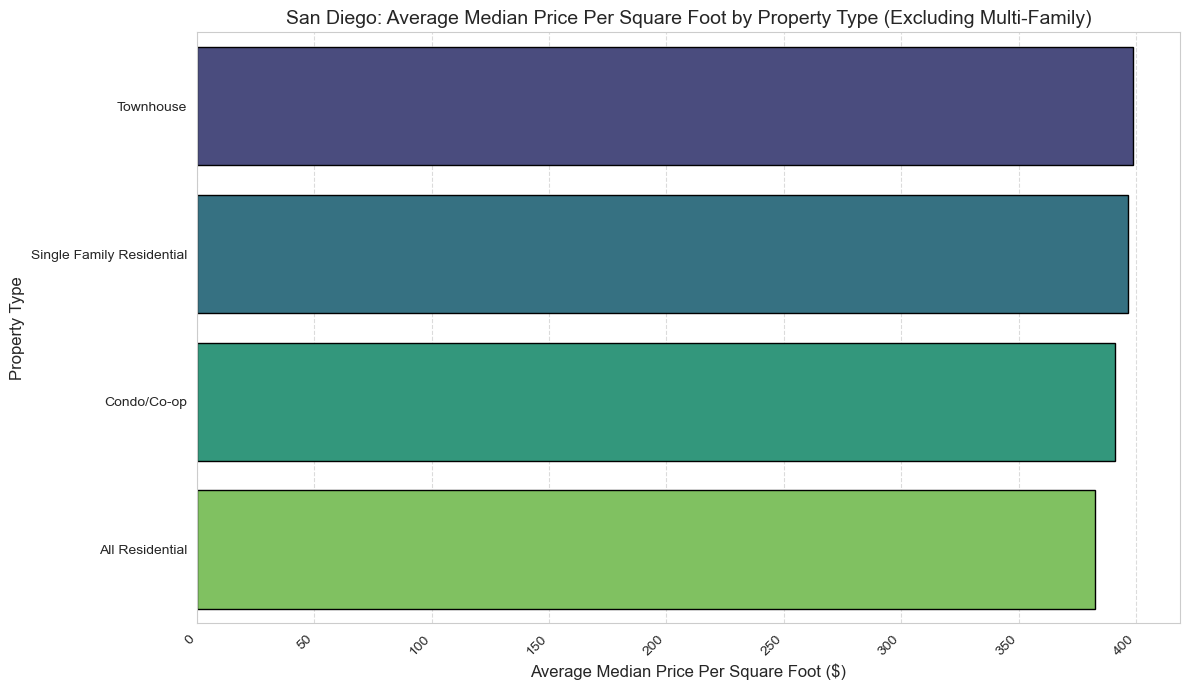

In [102]:
plt.figure(figsize=(12, 7))
sns.barplot(x='Average_Median_PPSF', y='PROPERTY_TYPE', data=property_type_summary_ppsf, palette='viridis', edgecolor='black', linewidth=1)
plt.xlabel('Average Median Price Per Square Foot ($)', fontsize=12)
plt.ylabel('Property Type', fontsize=12)
plt.title('San Diego: Average Median Price Per Square Foot by Property Type (Excluding Multi-Family)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Sorting summary by average DOM and creating visualization for Average Median Days on Market by Property Type:

In [103]:
property_type_summary_dom = property_type_summary.sort_values(by='Average_Median_DOM', ascending=True)

C:\Users\sselig\AppData\Local\Temp\ipykernel_21472\621356976.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average_Median_DOM', y='PROPERTY_TYPE', data=property_type_summary_dom, palette='magma', edgecolor='black', linewidth=1)


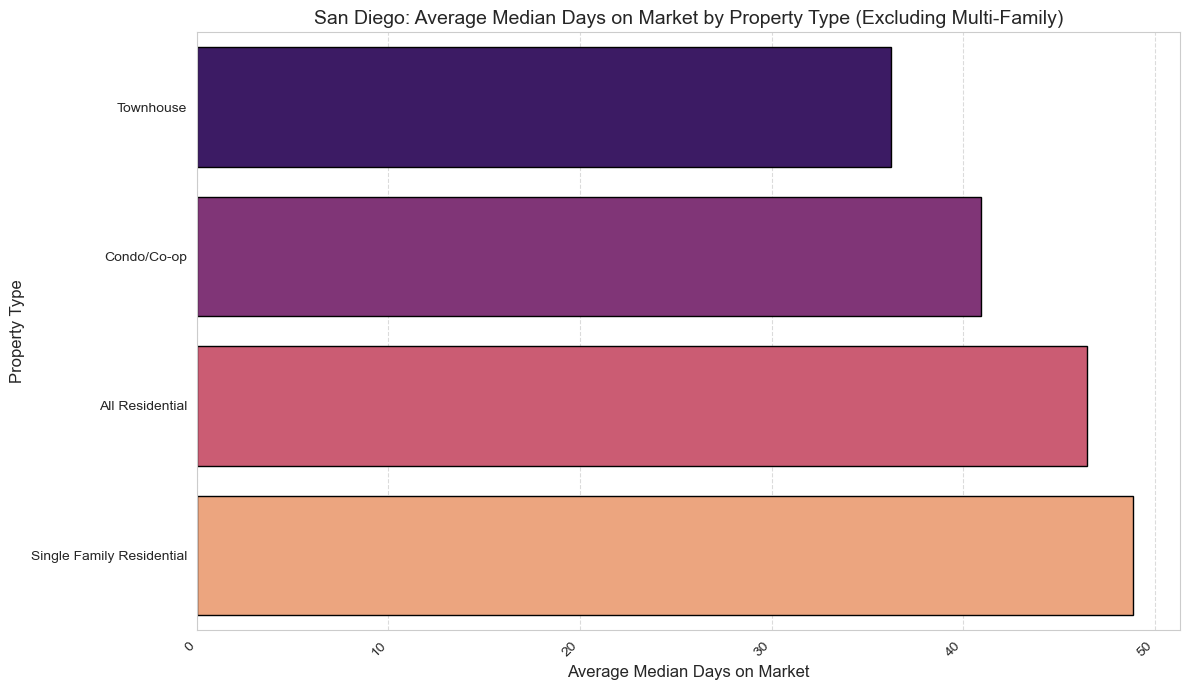

In [104]:
plt.figure(figsize=(12, 7))
sns.barplot(x='Average_Median_DOM', y='PROPERTY_TYPE', data=property_type_summary_dom, palette='magma', edgecolor='black', linewidth=1)
plt.xlabel('Average Median Days on Market', fontsize=12)
plt.ylabel('Property Type', fontsize=12)
plt.title('San Diego: Average Median Days on Market by Property Type (Excluding Multi-Family)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Key Insights from Property Type Analysis (Question 1):

* For typical residential properties, **Single Family Residences** consistently command the highest average median price per square foot in San Diego.
* **Townhouses and Condos** generally offer more accessible entry points with lower PPSF and tend to sell faster (lower Days on Market) compared to Single Family Residential properties, indicating higher liquidity or specific buyer demand for these segments.
* **Note:** The analysis of property type dynamics (and subsequent analyses) explicitly excludes 'Multi-Family (2-4 Unit)' properties due to observed data anomalies that would skew the representation of typical residential market trends.

# --- 2. Regional Impact Analysis: Housing Prices and Market Dynamics ---

Printing Unique Regions:

In [105]:
print(df_san_diego['REGION'].unique())

['La Presa, CA' 'Descanso, CA' 'Carlsbad, CA' 'El Cajon, CA'
 'Winter Gardens, CA' 'Hidden Meadows, CA' 'Eucalyptus Hills, CA'
 'Fallbrook, CA' 'Ramona, CA' 'La Mesa, CA' 'Lemon Grove, CA'
 'Jacumba, CA' 'Julian, CA' 'Granite Hills, CA' 'Chula Vista, CA'
 'Pauma Valley, CA' 'Solana Beach, CA' 'National City, CA'
 'Rancho Santa Fe, CA' 'Borrego Springs, CA' 'Lakeside, CA'
 'San Diego, CA' 'Encinitas, CA' 'Jamul, CA' 'San Marcos, CA' 'Bonita, CA'
 'Rancho San Diego, CA' 'Bostonia, CA' 'Bonsall, CA' 'Del Mar, CA'
 'Imperial Beach, CA' 'Vista, CA' 'Crest, CA' 'Pine Valley, CA'
 'Fairbanks Ranch, CA' 'Alpine, CA' 'Campo, CA' 'La Jolla Amago, CA'
 'San Diego Country Estates, CA' 'Coronado, CA' 'Santee, CA'
 'Valley Center, CA' 'Harbison Canyon, CA' 'Oceanside, CA'
 'Lake San Marcos, CA' 'Escondido, CA' 'Casa de Oro-Mount Helix, CA'
 'Spring Valley, CA' 'Poway, CA' 'Rainbow, CA' 'Santa Ysabel, CA'
 'Boulevard, CA' 'Mount Laguna, CA' 'Potrero, CA' 'Ranchita, CA'
 'Palomar Mountain, CA' 'Dulzur

Creating a filtered DF for regional summary exluding multi-family:

In [106]:
df_san_diego_residential_only = df_san_diego[df_san_diego['PROPERTY_TYPE'] != 'Multi-Family (2-4 Unit)'].copy()

Grouping key metrics by Region:

In [107]:
regional_summary_base = df_san_diego_residential_only.groupby('REGION').agg(Average_Median_Sale_Price=('MEDIAN_SALE_PRICE', 'mean'), Average_Median_PPSF=('MEDIAN_PPSF', 'mean'), Average_Median_DOM=('MEDIAN_DOM', 'mean'), Total_Homes_Sold=('HOMES_SOLD', 'sum'), Count_of_Months=('REGION', 'count')).reset_index()


Printing summary:

In [108]:
regional_summary_for_print = regional_summary_base.sort_values(by='Average_Median_PPSF', ascending=False)
print(regional_summary_for_print.head(15))

                 REGION  Average_Median_Sale_Price  Average_Median_PPSF  \
13          Del Mar, CA               2.381237e+06          1156.936868   
11         Coronado, CA               1.711573e+06           957.114787   
55     Solana Beach, CA               1.308609e+06           724.158719   
29   La Jolla Amago, CA               1.473236e+06           709.896222   
49  Rancho Santa Fe, CA               2.672989e+06           659.271469   
17        Encinitas, CA               1.043871e+06           604.906285   
20  Fairbanks Ranch, CA               3.241022e+06           532.997549   
51        San Diego, CA               6.045197e+05           456.905254   
25   Imperial Beach, CA               5.632937e+05           440.051159   
8          Carlsbad, CA               8.233835e+05           432.732717   
47         Ranchita, CA               3.524500e+05           402.960526   
44            Poway, CA               6.686891e+05           400.976536   
32  Lake San Marcos, CA  

Investigating Multi-family:

In [109]:
print("\n--- Diagnostic: Average Median PPSF by Property Type for Specific Regions (Full Data) ---")
print("\nAverage Median PPSF for 'Lemon Grove, CA' by Property Type (Full Data):")
print(df_san_diego[df_san_diego['REGION'] == 'Lemon Grove, CA'].groupby('PROPERTY_TYPE')['MEDIAN_PPSF'].mean())

print("\nAverage Median PPSF for 'Chula Vista, CA' by Property Type (Full Data):")
print(df_san_diego[df_san_diego['REGION'] == 'Chula Vista, CA'].groupby('PROPERTY_TYPE')['MEDIAN_PPSF'].mean())

print("\nAverage Median PPSF for 'Del Mar, CA' by Property Type (Full Data):")
print(df_san_diego[df_san_diego['REGION'] == 'Del Mar, CA'].groupby('PROPERTY_TYPE')['MEDIAN_PPSF'].mean())

print("\nAverage Median PPSF for 'San Diego, CA' (City) by Property Type (Full Data):")
print(df_san_diego[df_san_diego['REGION'] == 'San Diego, CA'].groupby('PROPERTY_TYPE')['MEDIAN_PPSF'].mean())


--- Diagnostic: Average Median PPSF by Property Type for Specific Regions (Full Data) ---

Average Median PPSF for 'Lemon Grove, CA' by Property Type (Full Data):
PROPERTY_TYPE
All Residential               348.893453
Condo/Co-op                   284.884860
Multi-Family (2-4 Unit)      6606.988356
Single Family Residential     362.403213
Townhouse                     353.616917
Name: MEDIAN_PPSF, dtype: float64

Average Median PPSF for 'Chula Vista, CA' by Property Type (Full Data):
PROPERTY_TYPE
All Residential               314.648236
Condo/Co-op                   312.301333
Multi-Family (2-4 Unit)      6280.461873
Single Family Residential     318.838358
Townhouse                     303.701262
Name: MEDIAN_PPSF, dtype: float64

Average Median PPSF for 'Del Mar, CA' by Property Type (Full Data):
PROPERTY_TYPE
All Residential              1187.343154
Condo/Co-op                   935.627989
Multi-Family (2-4 Unit)      1074.706297
Single Family Residential    1416.435342
Townhouse 

Above comfirms that multi-family is scewed but interesting it isn't scewed in EVERY region. Comfrims my choice to exclude.

Visualzing Average Median Sale Price by Sub-Region:

In [110]:
regional_summary_sale_price = regional_summary_base.sort_values(by='Average_Median_Sale_Price', ascending=False)

C:\Users\sselig\AppData\Local\Temp\ipykernel_21472\843418701.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average_Median_Sale_Price', y='REGION', data=regional_summary_sale_price.head(15), palette='cividis', edgecolor='black', linewidth=1)


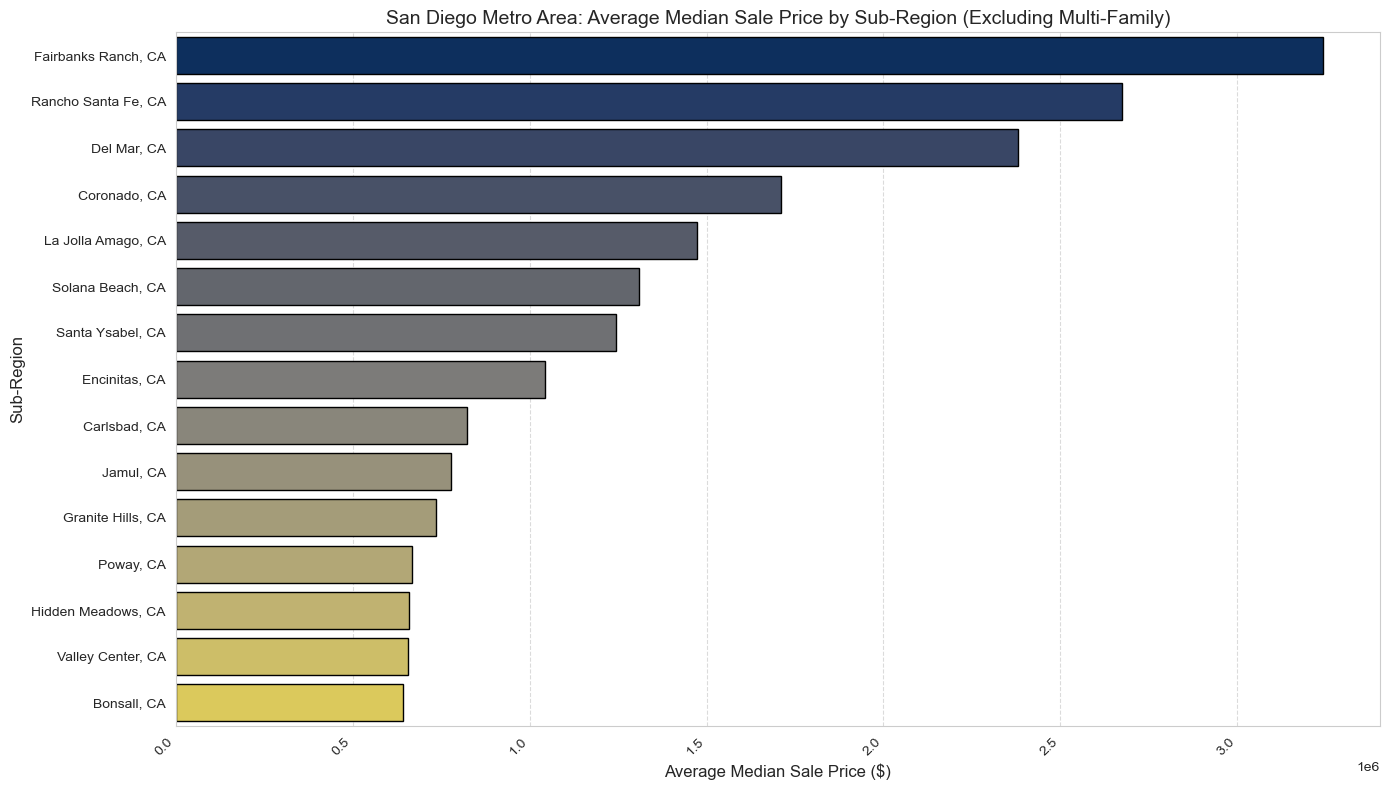

In [111]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Average_Median_Sale_Price', y='REGION', data=regional_summary_sale_price.head(15), palette='cividis', edgecolor='black', linewidth=1)
plt.xlabel('Average Median Sale Price ($)', fontsize=12)
plt.ylabel('Sub-Region', fontsize=12)
plt.title('San Diego Metro Area: Average Median Sale Price by Sub-Region (Excluding Multi-Family)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Visualzing Average Median Price Per Square Foot by Sub-Region:

In [112]:
regional_summary_ppsf = regional_summary_base.sort_values(by='Average_Median_PPSF', ascending=False)

C:\Users\sselig\AppData\Local\Temp\ipykernel_21472\828600543.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average_Median_PPSF', y='REGION', data=regional_summary_ppsf.head(15), palette='mako', edgecolor='black', linewidth=1)


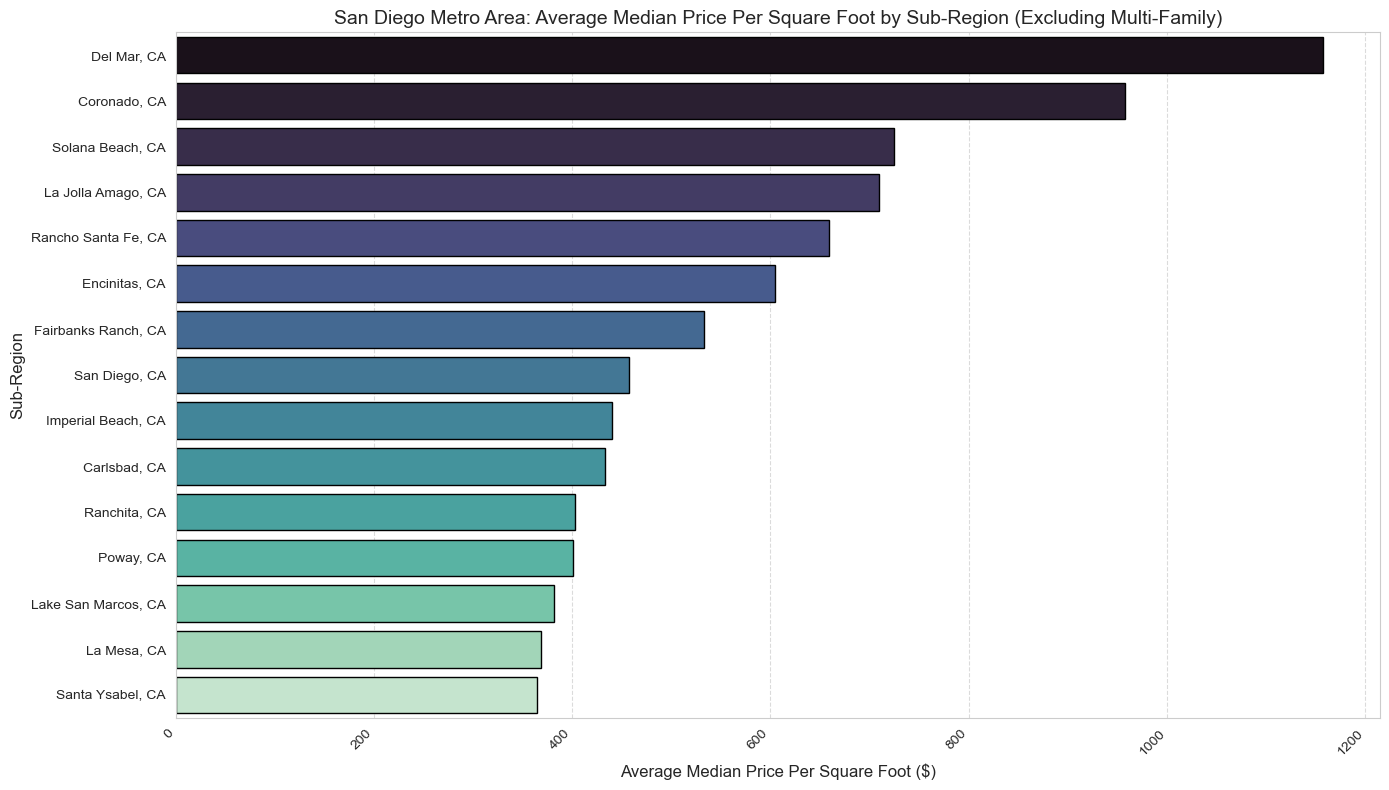

In [113]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Average_Median_PPSF', y='REGION', data=regional_summary_ppsf.head(15), palette='mako', edgecolor='black', linewidth=1)
plt.xlabel('Average Median Price Per Square Foot ($)', fontsize=12)
plt.ylabel('Sub-Region', fontsize=12)
plt.title('San Diego Metro Area: Average Median Price Per Square Foot by Sub-Region (Excluding Multi-Family)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Visualizing Average Median Days on Market by Sub-Region:

In [114]:
regional_summary_dom = regional_summary_base.sort_values(by='Average_Median_DOM', ascending=True)

C:\Users\sselig\AppData\Local\Temp\ipykernel_21472\1820068497.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Average_Median_DOM', y='REGION', data=regional_summary_dom.head(15), palette='rocket', edgecolor='black', linewidth=1)


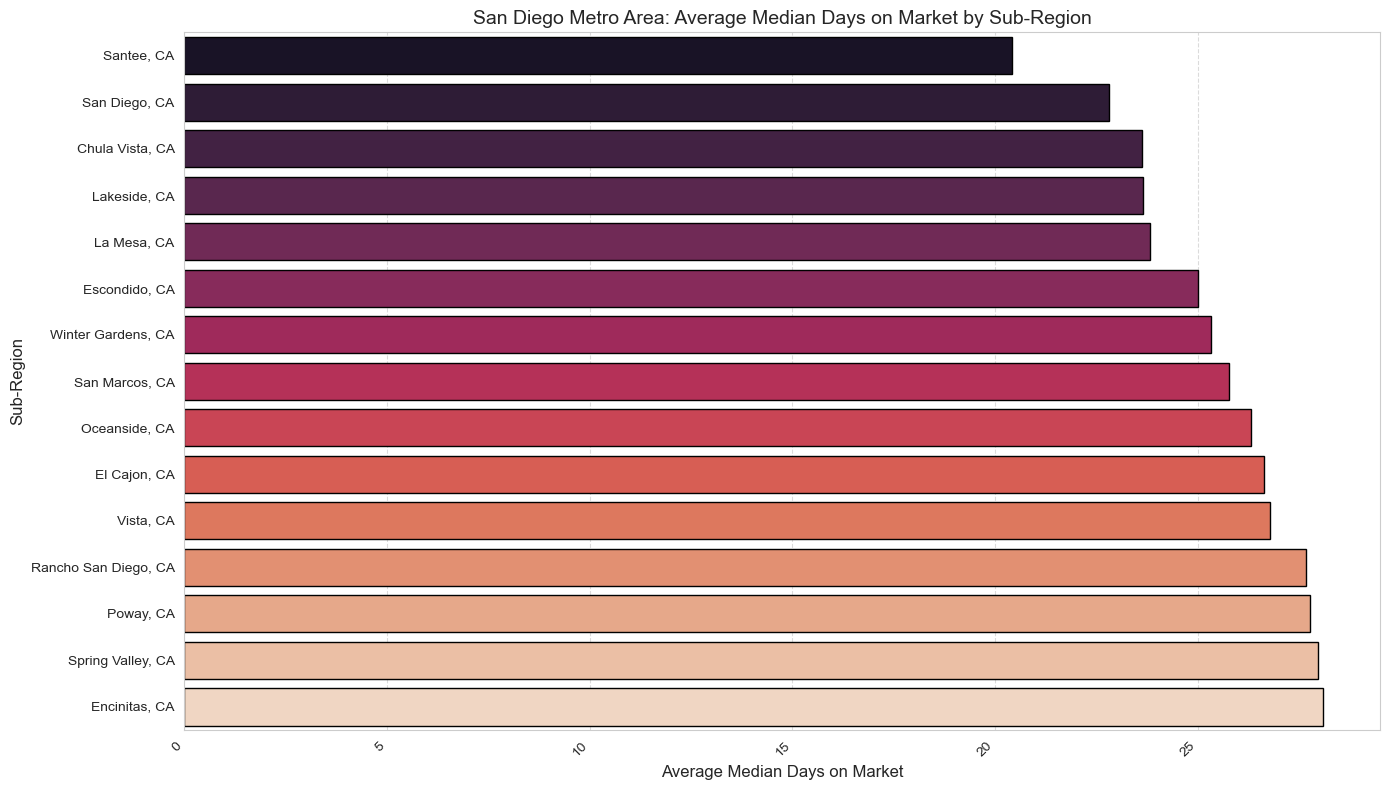

In [115]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Average_Median_DOM', y='REGION', data=regional_summary_dom.head(15), palette='rocket', edgecolor='black', linewidth=1)
plt.xlabel('Average Median Days on Market', fontsize=12)
plt.ylabel('Sub-Region', fontsize=12)
plt.title('San Diego Metro Area: Average Median Days on Market by Sub-Region', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Key Insights from Regional Impact Analysis (Question 2):

* Significant price disparities exist across San Diego's sub-regions. Affluent coastal areas like Del Mar and Coronado, along with luxury inland communities such as Fairbanks Ranch and Rancho Santa Fe, exhibit the highest average median sale prices and price per square foot for residential properties.
* More affordable and faster-selling markets tend to be found in inland areas like Santee, Chula Vista, and the main San Diego city itself (averaging faster DOM), reflecting areas where demand meets more accessible pricing.
* **Note:** The exclusion of 'Multi-Family (2-4 Unit)' properties from this analysis ensures that insights are representative and avoids potential skewing from data anomalies observed in the multi-family segment.

# --- 3. Time Series Analysis: Price Trends and Seasonality ---

Aggregating data to look at overall San Diego metro trends (exclduing multi-family):

In [116]:
df_san_diego_agg_residential = df_san_diego[df_san_diego['PROPERTY_TYPE'] != 'Multi-Family (2-4 Unit)'].copy()

Grouping by Date:

In [117]:
monthly_trends = df_san_diego_agg_residential.groupby('date').agg(Avg_Median_Sale_Price=('MEDIAN_SALE_PRICE', 'mean'), Avg_Median_PPSF=('MEDIAN_PPSF', 'mean')).reset_index()


Sorting by Date to ensure chronological order when plotting:

In [118]:
monthly_trends = monthly_trends.sort_values(by='date')

Printing monthly trends:

In [119]:
print(monthly_trends.head())

        date  Avg_Median_Sale_Price  Avg_Median_PPSF
0 2012-01-31          397670.773649       201.725191
1 2012-02-29          367818.036424       199.925702
2 2012-03-31          399586.289116       208.475426
3 2012-04-30          374394.237805       205.200383
4 2012-05-31          388828.343949       205.670663


In [120]:
print(monthly_trends.tail())

          date  Avg_Median_Sale_Price  Avg_Median_PPSF
154 2024-11-30           1.129710e+06       623.504622
155 2024-12-31           1.058440e+06       580.415081
156 2025-01-31           9.963351e+05       576.408168
157 2025-02-28           1.091191e+06       618.982875
158 2025-03-31           1.148529e+06       635.387703


Grouping by Month

In [121]:
seasonal_price_trend = df_san_diego_agg_residential.groupby('month').agg(Avg_Median_Sale_Price=('MEDIAN_SALE_PRICE', 'mean'), Avg_Median_PPSF=('MEDIAN_PPSF', 'mean')).reset_index()

Mapping month numbers to names for readablitiy when plotting:

In [122]:
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

In [123]:
seasonal_price_trend['month_name'] = seasonal_price_trend['month'].map(month_names)

Printing seasonal price (by month):

In [124]:
print(seasonal_price_trend)

    month  Avg_Median_Sale_Price  Avg_Median_PPSF month_name
0       1          709266.645853       393.475062        Jan
1       2          713991.944899       392.017960        Feb
2       3          722185.643189       396.598758        Mar
3       4          706717.674975       382.690687        Apr
4       5          696672.209500       386.848923        May
5       6          704568.498521       390.291583        Jun
6       7          704464.384330       388.524376        Jul
7       8          710271.102239       390.312408        Aug
8       9          707054.913207       393.674933        Sep
9      10          726525.243964       397.214269        Oct
10     11          710171.641650       390.330499        Nov
11     12          706003.258308       390.757498        Dec


Visualizing San Diego Median Sale Price Trend Over Time:

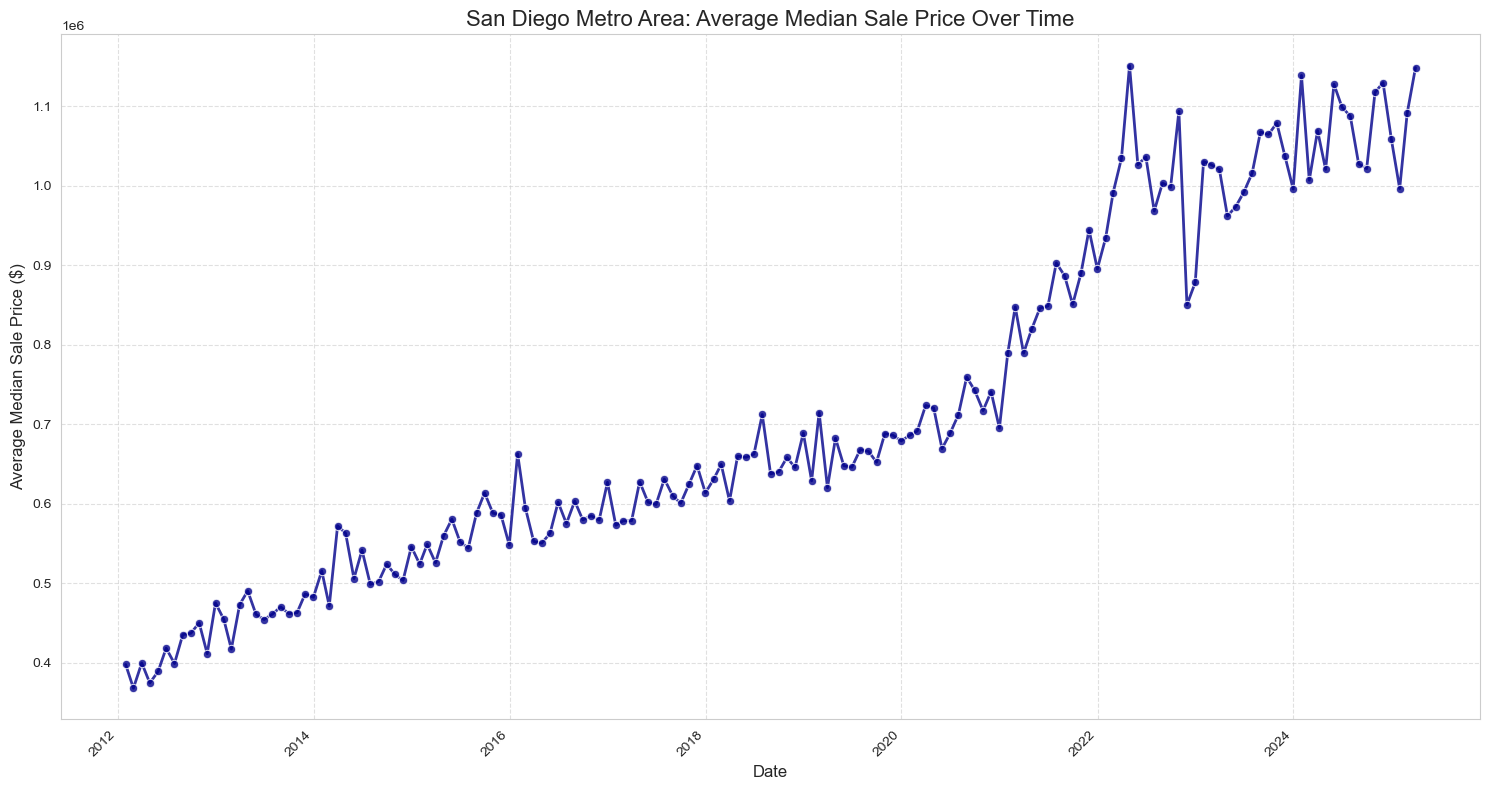

In [125]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='date', y='Avg_Median_Sale_Price', data=monthly_trends, marker='o', color='darkblue', linewidth=2, alpha=0.8)
plt.title('San Diego Metro Area: Average Median Sale Price Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Median Sale Price ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

Visualizing San Diego Median Price Per Square Foot Trend Over Time:

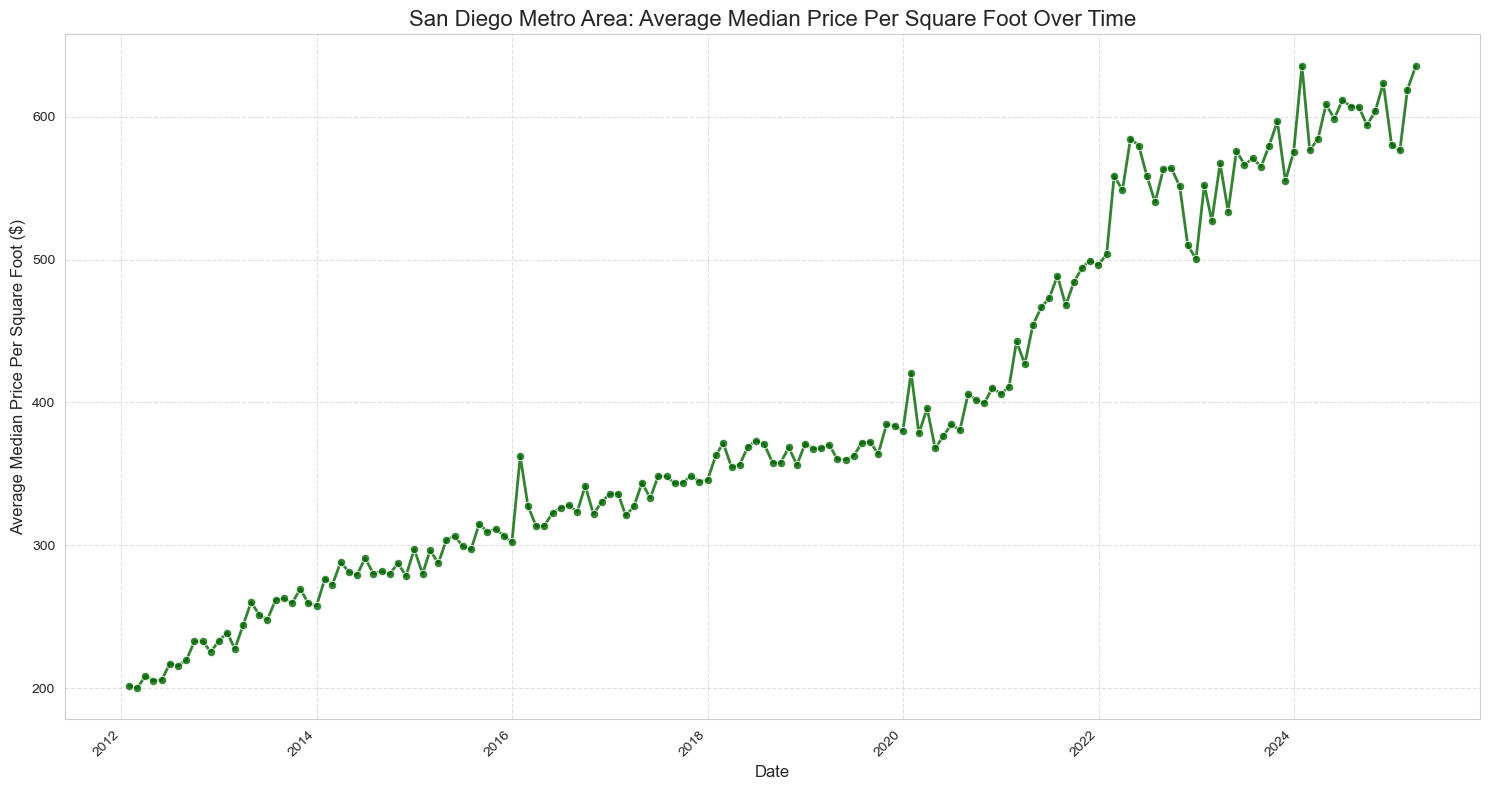

In [126]:
plt.figure(figsize=(15, 8))
sns.lineplot(x='date', y='Avg_Median_PPSF', data=monthly_trends, marker='o', color='darkgreen', linewidth=2, alpha=0.8)
plt.title('San Diego Metro Area: Average Median Price Per Square Foot Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Median Price Per Square Foot ($)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


Visualizing Seasonal Trends in Median Sale Price by Month:

C:\Users\sselig\AppData\Local\Temp\ipykernel_21472\4181672316.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month_name', y='Avg_Median_Sale_Price', data=seasonal_price_trend, palette='coolwarm', order=seasonal_price_trend['month_name'], edgecolor='black', linewidth=1)


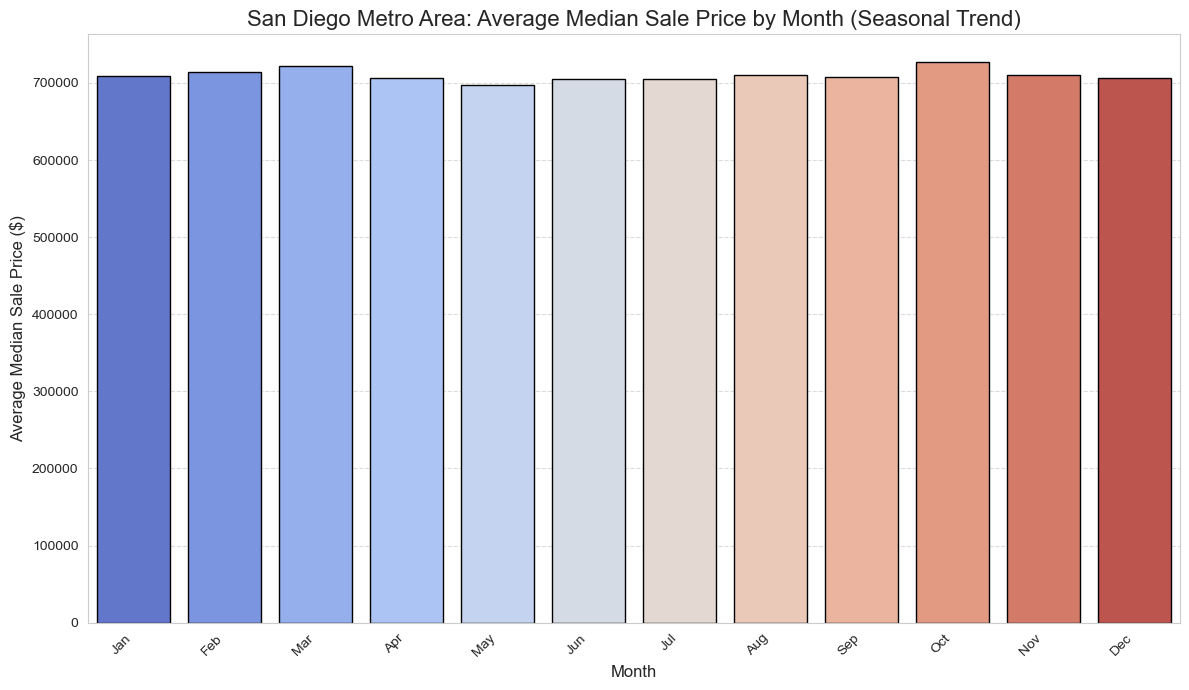

In [127]:
plt.figure(figsize=(12, 7))
sns.barplot(x='month_name', y='Avg_Median_Sale_Price', data=seasonal_price_trend, palette='coolwarm', order=seasonal_price_trend['month_name'], edgecolor='black', linewidth=1)
plt.title('San Diego Metro Area: Average Median Sale Price by Month (Seasonal Trend)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Median Sale Price ($)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Key Insights from Time Series Analysis (Question 3):

* The San Diego housing market has experienced **robust long-term price appreciation** from 2012 to early 2024, with a particularly sharp increase observed from late 2020 to early 2022, largely due to heightened demand and favorable interest rates during the pandemic era.
* Post-2022, the market stabilized from its rapid growth, showing a more balanced trajectory rather than continued sharp increases or significant declines.
* Clear **seasonal patterns** indicate that prices are typically lowest in winter (January/February) and peak during the spring and summer months (March-July), then cool slightly into late fall/early winter, aligning with traditional real estate cycles.